Create a nanotube. 

In [ ]:
from ase.build import nanotube
from ase import Atoms
from ase.io import write
import numpy as np

# Parameters for the nanotube
n = 6  # Chirality n
m = 6  # Chirality m
length = 6
# Length in unit cells
bond_length = 1.42  # Bond length for carbon-carbon

# Create the nanotube
cnt = nanotube(n, m, length=length)
write('nanotube.xyz', cnt)

Creating capped nanotubes: decent idea and seems to be working but much safer to just create a simple nanotube and then place hydrogens manually in avogadro or something like that. 

In [1]:
from ase.build import nanotube
from ase import Atoms
from ase.io import write
import numpy as np

# Parameters for the nanotube
n = 6  # Chirality n
m = 6  # Chirality m
length = 6
# Length in unit cells
bond_length = 1.42  # Bond length for carbon-carbon

# Create the nanotube
cnt = nanotube(n, m, length=length)

# Get positions of carbon atoms
positions = cnt.get_positions()

# Identify the carbon atoms at the ends
z_min = np.min(positions[:, 2])
z_max = np.max(positions[:, 2])
tolerance = 0.1  # Tolerance to include all end atoms

end_atoms_min = positions[np.where(np.abs(positions[:, 2] - z_min) < tolerance)]
end_atoms_max = positions[np.where(np.abs(positions[:, 2] - z_max) < tolerance)]

# Function to add hydrogen atoms to the end atoms
def add_hydrogens(end_atoms, direction):
    hydrogens = []
    for atom in end_atoms:
        hydrogen_position = atom + direction * np.array([0, 0, bond_length])
        hydrogens.append(hydrogen_position)
    return hydrogens

# Add hydrogen atoms at both ends
hydrogens_min = add_hydrogens(end_atoms_min, -1)
hydrogens_max = add_hydrogens(end_atoms_max, 1)

# Create hydrogen atoms
hydrogen_atoms = Atoms('H' * (len(hydrogens_min) + len(hydrogens_max)),
                       positions=hydrogens_min + hydrogens_max)

# Combine the nanotube and hydrogen atoms
capped_cnt = cnt + hydrogen_atoms

# Save the structure to an XYZ file
write('capped_nanotube_2.xyz', capped_cnt)


creating packmol input for filling a single nanotube with water. separated from nanotube creating script, cause I have more trust in adding hydrogens manually. 

In [7]:
import numpy as np
#input xyz paths 
nanotube_path = "nanotube.xyz"
water_path = output_path = "water.xyz"
#new xyz file to be created 
output_path = "packed_system.xyz"
#packmol input to be created
packmol_input_path = "input.in"
number_of_water_molecules = 1
def read_xyz(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        atom_count = int(lines[0])
        atoms = []

        for line in lines[2:2 + atom_count]:
            parts = line.split()
            atom_type = parts[0]
            x, y, z = map(float, parts[1:])
            atoms.append((atom_type, x, y, z))

    return atoms

def calculate_center_of_nanotube(atoms):
    coords = np.array([(x, y, z) for _, x, y, z in atoms])
    center = np.mean(coords, axis=0)
    return center

def generate_packmol_input(center, output_path):
    with open(output_path, 'w') as file:
        file.write("tolerance 2.0\n")
        file.write("filetype xyz\n")
        file.write(f"output {output_path}\n\n")
        
        # Add nanotube structure
        file.write(f"structure {nanotube_path}\n")
        file.write(f"  number {number_of_water_molecules}\n")
        file.write(f"  inside box {center[0]-10} {center[1]-10} {center[2]-10} {center[0]+10} {center[1]+10} {center[2]+10}\n")
        file.write("end structure\n\n")

        # Add water molecules structure
        file.write(f"structure {water_path}\n")
        file.write("  number 20\n")
        file.write(f"  inside box {center[0]-1} {center[1]-1} {center[2]-5} {center[0]+1} {center[1]+1} {center[2]+5}\n")
        file.write("end structure\n")



# Read nanotube coordinates and calculate center
nanotube_atoms = read_xyz(nanotube_path)
center_of_nanotube = calculate_center_of_nanotube(nanotube_atoms)

# Generate Packmol input file
generate_packmol_input(center_of_nanotube, packmol_input_path)

print(f"Center of nanotube: {center_of_nanotube}")
print(f"Packmol input file '{packmol_input_path}' generated successfully.")


Center of nanotube: [-2.39523899 -0.90398254  9.84808   ]
Packmol input file 'input.in' generated successfully.


In [ ]:
.xyz"
water_path = output_path = "water.xyz"
#new xyz file to be created 
output_path = "packed_system.xyz"
#packmol input to be created
packmol_input_path = "input.in"
number_of_water_molecules = 1
def read_xyz(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        atom_count = int(lines[0])
        atoms = []

        for line in lines[2:2 + atom_count]:
            parts = line.split()
            atom_type = parts[0]
            x, y, z = map(float, parts[1:])
            atoms.append((atom_type, x, y, z))

    return atoms

def calculate_center_of_nanotube(atoms):
    coords = np.array([(x, y, z) for _, x, y, z in atoms])
    center = np.mean(coords, axis=0)
    return center

def generate_packmol_input(center, output_path):
    with open(output_path, 'w') as file:
        file.write("tolerance 2.0\n")
        file.write("filetype xyz\n")
        file.write(f"output {output_path}\n\n")
        
        # Add nanotube structure
        file.write(f"structure {nanotube_path}\n")
        file.write(f"  number {number_of_water_molecules}\n")
        file.write(f"  inside box {center[0]-10} {center[1]-10} {center[2]-10} {center[0]+10} {center[1]+10} {center[2]+10}\n")
        file.write("end structure\n\n")

        # Add water molecules structure
        file.write(f"structure {water_path}\n")
        file.write("  number 20\n")
        file.write(f"  inside box {center[0]-1} {center[1]-1} {center[2]-5} {center[0]+1} {center[1]+1} {center[2]+5}\n")
        file.write("end structure\n")



# Read nanotube coordinates and calculate center
nanotube_atoms = read_xyz(nanotube_path)
center_of_nanotube = calculate_center_of_nanotube(nanotube_atoms)

# Generate Packmol input file
generate_packmol_input(center_of_nanotube, packmol_input_path)

print(f"Center of nanotube: {center_of_nanotube}")
print(f"Packmol input file '{packmol_input_path}' generated successfully.")


creating multiple packmol inputs for nanotubes of different diameters and lengths

In [16]:
import numpy as np
diameters = [3, 6, 12]  # Example list of diameters of nanotubes
lengths = [20, 30, 40] # Example list of lengths of nanotubes
# Generalized file paths for nanotube and water XYZ files
nanotube_base_path = "capped_nanotube/nanotube_{d}/{l}/nanotube.xyz"
water_base_path = "water.xyz"  # Assuming the same water file is used for all configurations

# Output file paths
output_base_path = "capped_nanotube/nanotube_{d}/{l}/packed_system_{d}_{l}.xyz"
packmol_input_base_path = "capped_nanotube/nanotube_{d}/{l}/input_{d}_{l}.in"

# Number of water molecules based on nanotube diameter - that was just trial and error obtained expression 
def calculate_number_of_water_molecules(diameter):
    return 3 * (diameter / 3) ** 2

# Read an XYZ file to extract atom coordinates
def read_xyz(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        atom_count = int(lines[0])
        atoms = []

        for line in lines[2:2 + atom_count]:
            parts = line.split()
            atom_type = parts[0]
            x, y, z = map(float, parts[1:])
            atoms.append((atom_type, x, y, z))

    return atoms

# Calculate the center of a nanotube based on its atom coordinates
def calculate_center_of_nanotube(atoms):
    coords = np.array([(x, y, z) for _, x, y, z in atoms])
    center = np.mean(coords, axis=0)
    return center

# Generate the Packmol input file
def generate_packmol_input(water, center, output_path, nanotube_xyz_path):
    with open(output_path, 'w') as file:
        file.write("tolerance 2.0\n")
        file.write("filetype xyz\n")
        file.write(f"output nanotube_with_water_{water}.xyz\n\n")
        
        # Add nanotube structure
        file.write(f"structure {nanotube_xyz_path}\n")
        file.write("  fixed 0. 0. 0. 0. 0. 0.\n")
        file.write("end structure\n\n")

        # Add water molecules structure
        file.write(f"structure {water_base_path}\n")
        file.write(f"  number {int(water)}\n")
        x_center, y_center, z_center = center
        file.write(f"  inside box {x_center-0.5} {y_center-0.5} {z_center-5} {x_center+0.5} {y_center+0.5} {z_center+5}\n")
        file.write("end structure\n")

# Generate Packmol input and output files for various nanotube dimensions
for d in diameters:  
    for l in lengths:  
        water = calculate_number_of_water_molecules(d)  # Calculate water molecule count based on diameter
        nanotube_xyz_path = nanotube_base_path.format(d=d, l=l)
        packmol_input_path = packmol_input_base_path.format(d=d, l=l)
        
        # Read nanotube coordinates and calculate center
        nanotube_atoms = read_xyz(nanotube_xyz_path)
        center_of_nanotube = calculate_center_of_nanotube(nanotube_atoms)

        # Generate Packmol input file
        generate_packmol_input(water, center_of_nanotube, packmol_input_path, nanotube_xyz_path)

        print(f"Center of nanotube (d={d}, l={l}): {center_of_nanotube}")
        print(f"Packmol input file '{packmol_input_path}' generated successfully.")
        print(f"Number of water molecules: {water}")


Center of nanotube: [1.869045   3.23728149 9.85712579]
Packmol input file 'capped_nanotube/nanotube_3/20/input.in' generated successfully.
3.0
Center of nanotube: [ 1.869045    3.23728154 14.78568963]
Packmol input file 'capped_nanotube/nanotube_3/30/input.in' generated successfully.
3.0
Center of nanotube: [ 1.869045    3.23728157 19.71425257]
Packmol input file 'capped_nanotube/nanotube_3/40/input.in' generated successfully.
3.0
Center of nanotube: [-2.39523899 -0.90398254  9.84808   ]
Packmol input file 'capped_nanotube/nanotube_6/20/input.in' generated successfully.
12.0
Center of nanotube: [ 2.87933247  4.98715    14.77212   ]
Packmol input file 'capped_nanotube/nanotube_6/30/input.in' generated successfully.
12.0
Center of nanotube: [ 2.87933248  4.98715    19.69616   ]
Packmol input file 'capped_nanotube/nanotube_6/40/input.in' generated successfully.
12.0
Center of nanotube: [4.91117353 8.50640118 9.84575684]
Packmol input file 'capped_nanotube/nanotube_12/20/input.in' generate

also creates nanotubes, but easier to set length

In [ ]:
from ase import Atoms
from ase.build import nanotube
from ase.io import write
import numpy as np

# Generalized variables
chiral_indices = (6, 6)  # Chiral indices of the nanotube
nanotube_length = 40  # Length of the nanotube in Angstroms
unit_length = 2.46  # Unit length for nanotube periodicity
vacuum_space = 5.0  # Vacuum space around the nanotube in all directions
box_padding = 5.0  # Padding for the box size in z-direction
water_molecule_count = 30  # Number of water molecules
output_nanotube_file = "carbon_nanotube_periodic.xyz"  # Output nanotube XYZ file path
output_packmol_file = "packmol_input.inp"  # Output Packmol input file path
water_file_path = "water_molecules.xyz"  # Path to the water molecules XYZ file

# Create the nanotube
cnt = nanotube(n=chiral_indices[0], m=chiral_indices[1], length=int(nanotube_length/unit_length))

# Define the box size slightly larger than the nanotube length
box_length = cnt.cell[2, 2] + box_padding  # Adding padding in the z-direction
box_size = [cnt.cell[0, 0], cnt.cell[1, 1], box_length]

# Set the cell size for the nanotube
cnt.set_cell(box_size)

# Center the nanotube in the box with vacuum space
cnt.center(vacuum=vacuum_space, axis=(0, 1, 2))

# Apply periodic boundary conditions in all directions
cnt.set_pbc([True, True, True])

# Write the nanotube structure to an XYZ file
write(output_nanotube_file, cnt)

# Read atoms from the nanotube and store their coordinates
def read_atoms_from_nanotube(cnt):
    atoms = []
    for atom in cnt:
        atom_type = atom.symbol
        x, y, z = atom.position
        atoms.append((atom_type, x, y, z))
    return atoms

# Calculate the center of the nanotube
def calculate_center_of_nanotube(atoms):
    coords = np.array([(x, y, z) for _, x, y, z in atoms])
    center = np.mean(coords, axis=0)
    return center

# Generate the Packmol input file to insert water molecules into the nanotube
def generate_packmol_input(water, center, output_path, nanotube_file, water_file):
    with open(output_path, 'w') as file:
        file.write("tolerance 2.0\n")
        file.write("filetype xyz\n")
        file.write(f"output {nanotube_file}\n\n")
        
        # Add nanotube structure
        file.write(f"structure {nanotube_file}\n")
        file.write("  fixed 0. 0. 0. 0. 0. 0.\n")
        file.write("end structure\n\n")

        # Add water molecules structure
        file.write(f"structure {water_file}\n")
        file.write(f"  number {int(water)}\n")
        x_center, y_center, z_center = center
        # Define the box where water molecules will be placed inside the nanotube
        file.write(f"  inside box {x_center-0.5} {y_center-0.5} {z_center-5} {x_center+0.5} {y_center+0.5} {z_center+5}\n")
        file.write("end structure\n")

# Main execution
atoms = read_atoms_from_nanotube(cnt)
center = calculate_center_of_nanotube(atoms)
generate_packmol_input(water=water_molecule_count, center=center, output_path=output_packmol_file, nanotube_file=output_nanotube_file, water_file=water_file_path)


-Loads the universe using MDAnalysis.Universe() for a topology and trajectory file in XYZ format.
-Selects nanotube atoms (based on atom name 'C') and determines the bounding box of the nanotube using the minimum and maximum coordinates.
-Selects water molecules (based on atom name 'O') inside the bounding box.
-Computes MSD using EinsteinMSD in the z-direction for all water molecules that remain continuously present until a specific half-frame of the trajectory.
-Outputs the MSD values and plots the result.

Nanotube coordinates: x: [-1.2058299779891968, 6.9644999504089355], y: [0.9019899964332581, 9.072309494018555], z: [0.0, 29.544239044189453]


100%|██████████| 12/12 [00:00<00:00, 717.57it/s]


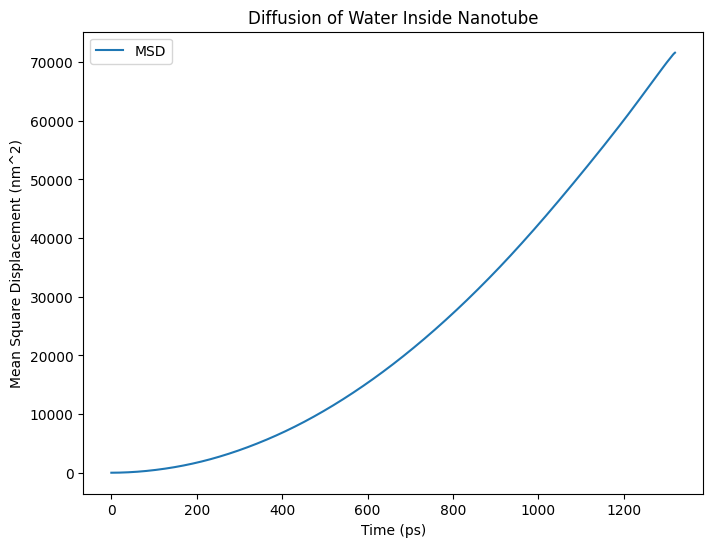

Diffusion coefficient: 9.1968e+00 nm^2/ps


In [34]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import numpy as np

def analyze_diffusion(topology_file, trajectory_file, nanotube_atom_name='C', water_atom_name='O'):
    # Load the XYZ and EXTXYZ files with format specified
    u = mda.Universe(topology_file, trajectory_file, format='XYZ')

    # Select nanotube atoms (assuming they are named 'C')
    nanotube = u.select_atoms(f'name {nanotube_atom_name}')

    # Get the bounding box of the nanotube
    min_x = nanotube.positions[:, 0].min()
    max_x = nanotube.positions[:, 0].max()
    min_y = nanotube.positions[:, 1].min()
    max_y = nanotube.positions[:, 1].max()
    min_z = nanotube.positions[:, 2].min()
    max_z = nanotube.positions[:, 2].max()

    # Print the bounding box of the nanotube
    print(f"Nanotube coordinates: x: [{min_x}, {max_x}], y: [{min_y}, {max_y}], z: [{min_z}, {max_z}]")

    # Select water molecules inside the nanotube bounding box
    water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')

    # Ensure we have water molecules selected
    if len(water) == 0:
        print("No water molecules found within the specified nanotube region.")
        return None

    # Compute the MSD for the water molecules
    msd_analysis = EinsteinMSD(water, select='all', msd_type='xyz')
    msd_analysis.run()

    # Access MSD results
    msd_values = msd_analysis.results.timeseries
    time_steps = np.arange(len(msd_values)) * u.trajectory.dt

    # Plot the MSD
    plt.figure(figsize=(8, 6))
    plt.plot(time_steps, msd_values, label='MSD')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (nm^2)')
    plt.title('Diffusion of Water Inside Nanotube')
    plt.legend()
    plt.show()

    # Fit a line to the MSD data to get the slope
    valid_indices = ~np.isnan(msd_values)  # Consider only valid values
    slope, intercept = np.polyfit(time_steps[valid_indices], msd_values[valid_indices], 1)
    diffusion_coefficient = slope / 6  # for 3D diffusion

    print(f"Diffusion coefficient: {diffusion_coefficient:.4e} nm^2/ps")

    return diffusion_coefficient

# Example usage for a single nanotube
diffusion_coefficient = analyze_diffusion(
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_6\30\nanotube_with_water_1.xyz', 
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_6\30\simulation.pos_0.extxyz'
)

# You can now call analyze_diffusion for different nanotubes by changing the file names
# diffusion_coefficient = analyze_diffusion('another_topology.xyz', 'another_trajectory.extxyz')


Finds empty time step: The find_empty_time_step() function searches the trajectory for a time step when no water molecules are inside the nanotube. If no such frame is found, the last frame is used.
Water molecule tracking: It labels water molecules present in the nanotube at each timestep and filters those that remain continuously inside the nanotube until a given half-frame.
Manual MSD computation: It manually computes the MSD in the z-direction for the water molecules that were continuously present.

Nanotube coordinates: x: [-1.2058299779891968, 6.9644999504089355], y: [0.9019899964332581, 9.072309494018555], z: [0.0, 29.544239044189453]
Time step with no water molecules inside the nanotube: 104
Valid water molecules present continuously from frame 52 to 104: 1


100%|██████████| 52/52 [00:00<00:00, 52003.77it/s]

Available results attributes: ['_MutableMapping__marker', '__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_validate_key', 'clear', 'copy', 'data', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
Available results keys: KeysView({'msds_by_particle': array([[0.        ],
       [0.08703176],
       [0.27710612],
       [0.50738844],
       [0.81971878],
       [1.21665497],
       [1.65247261],
      

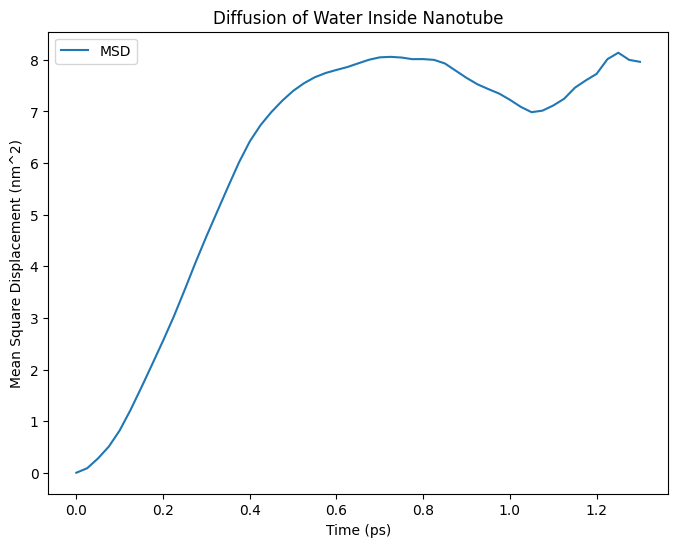

In [52]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        if len(water) == 0:
            return ts.frame
    return None

def analyze_diffusion(topology_file, trajectory_file, nanotube_atom_name='C', water_atom_name='O'):
    u = mda.Universe(topology_file, trajectory_file, format='XYZ')

    nanotube = u.select_atoms(f'name {nanotube_atom_name}')
    min_x, max_x = nanotube.positions[:, 0].min(), nanotube.positions[:, 0].max()
    min_y, max_y = nanotube.positions[:, 1].min(), nanotube.positions[:, 1].max()
    min_z, max_z = nanotube.positions[:, 2].min(), nanotube.positions[:, 2].max()

    print(f"Nanotube coordinates: x: [{min_x}, {max_x}], y: [{min_y}, {max_y}], z: [{min_z}, {max_z}]")

    t_frame = find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)
    if t_frame is None:
        print("No time step found with zero water molecules inside the nanotube.")
        return None

    print(f"Time step with no water molecules inside the nanotube: {t_frame}")

    half_frame = t_frame // 2

    u.trajectory[half_frame]
    initial_water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
    water_indices = initial_water.indices
    present_continuously = {idx: True for idx in water_indices}

    for ts in u.trajectory[half_frame:t_frame]:
        current_water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        current_indices = set(current_water.indices)
        for idx in water_indices:
            if idx not in current_indices:
                present_continuously[idx] = False

    valid_indices = [idx for idx, present in present_continuously.items() if present]
    print(f"Valid water molecules present continuously from frame {half_frame} to {t_frame}: {len(valid_indices)}")

    u.trajectory[0]
    valid_water = u.atoms[valid_indices]

    # Compute MSD for valid water molecules using MDAnalysis
    msd_analysis = EinsteinMSD(valid_water, select='all', msd_type='xyz', fft=False)
    msd_analysis.run(start=0, stop=half_frame+1)

    # Debug: print available result attributes
    print("Available results attributes:", dir(msd_analysis.results))
    print("Available results keys:", msd_analysis.results.keys())

    # Access MSD results
    msd_values = msd_analysis.results['msds_by_particle'].mean(axis=1)
    time_steps = msd_analysis.results['timeseries']

    # Time steps in ps (25 fs per frame)
    time_steps = np.arange(len(msd_values)) * 25 * 1e-3

    np.savez('msd_data.npz', time_steps=time_steps, msd_values=msd_values)

    valid_indices = ~np.isnan(msd_values)
    slope, intercept = np.polyfit(time_steps[valid_indices], msd_values[valid_indices], 1)
    diffusion_coefficient = slope / 6

    print(f"Diffusion coefficient: {diffusion_coefficient:.4e} nm^2/ps")

    plt.figure(figsize=(8, 6))
    plt.plot(time_steps, msd_values, label='MSD')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (nm^2)')
    plt.title('Diffusion of Water Inside Nanotube')
    plt.legend()
    plt.show()

    return diffusion_coefficient
diffusion_coefficient = analyze_diffusion(
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_6\30\nanotube_with_water_1.xyz',
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_6\30\simulation.pos_0.extxyz'
)


# Example usage in Jupyter


Finds empty time step: The find_empty_time_step() function searches the trajectory for a time step when no water molecules are inside the nanotube. If no such frame is found, the last frame is used.
Water molecule tracking: It labels water molecules present in the nanotube at each timestep and filters those that remain continuously inside the nanotube until a given half-frame.
Manual MSD computation: It manually computes the MSD in the z-direction for the water molecules that were continuously present.

Nanotube coordinates: x: [-1.2058299779891968, 6.9644999504089355], y: [0.9019899964332581, 9.072309494018555], z: [0.0, 29.544239044189453]
Time step with no water molecules inside the nanotube (or end of trajectory): 104
Valid water molecules present continuously from start to frame 52: 5


100%|██████████| 52/52 [00:00<00:00, 52924.97it/s]

Available results attributes: ['_MutableMapping__marker', '__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_validate_key', 'clear', 'copy', 'data', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
Available results keys: KeysView({'msds_by_particle': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [7.26122007e-02, 7.11448747e-02, 7.11401851e-02, 

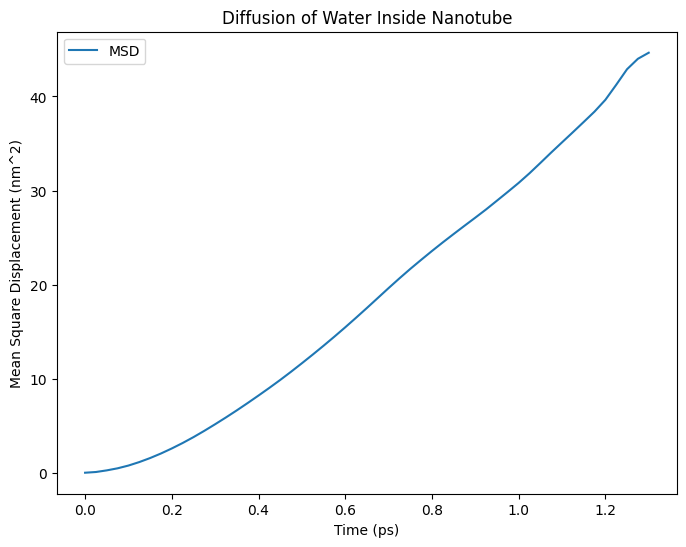

In [61]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        if len(water) == 0:
            return ts.frame
    return None

def analyze_diffusion(topology_file, trajectory_file, nanotube_atom_name='C', water_atom_name='O'):
    u = mda.Universe(topology_file, trajectory_file, format='XYZ')

    nanotube = u.select_atoms(f'name {nanotube_atom_name}')
    min_x, max_x = nanotube.positions[:, 0].min(), nanotube.positions[:, 0].max()
    min_y, max_y = nanotube.positions[:, 1].min(), nanotube.positions[:, 1].max()
    min_z, max_z = nanotube.positions[:, 2].min(), nanotube.positions[:, 2].max()

    print(f"Nanotube coordinates: x: [{min_x}, {max_x}], y: [{min_y}, {max_y}], z: [{min_z}, {max_z}]")

    t_frame = find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)
    
    if t_frame is None:
        print("No time step found with zero water molecules inside the nanotube.")
        t_frame = u.trajectory.n_frames - 1  # Use the last frame for analysis
    
    print(f"Time step with no water molecules inside the nanotube (or end of trajectory): {t_frame}")

    half_frame = t_frame // 2

    u.trajectory[0]
    initial_water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
    water_indices = initial_water.indices
    present_continuously = {idx: True for idx in water_indices}

    for ts in u.trajectory[1:half_frame+1]:
        current_water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        current_indices = set(current_water.indices)
        for idx in water_indices:
            if idx not in current_indices:
                present_continuously[idx] = False

    valid_indices = [idx for idx, present in present_continuously.items() if present]
    print(f"Valid water molecules present continuously from start to frame {half_frame}: {len(valid_indices)}")

    if len(valid_indices) == 0:
        print("No water molecules were continuously present in the nanotube.")
        return None

    u.trajectory[0]
    valid_water = u.atoms[valid_indices]

    # Compute MSD for valid water molecules using MDAnalysis
    msd_analysis = EinsteinMSD(valid_water, select='all', msd_type='xyz', fft=False)
    msd_analysis.run(start=0, stop=half_frame+1)

    # Debug: print available result attributes
    print("Available results attributes:", dir(msd_analysis.results))
    print("Available results keys:", msd_analysis.results.keys())

    # Access MSD results
    msd_values = msd_analysis.results['msds_by_particle'].mean(axis=1)
    time_steps = msd_analysis.results['timeseries']

    # Time steps in ps (25 fs per frame)
    time_steps = np.arange(len(msd_values)) * 25 * 1e-3

    np.savez('msd_data.npz', time_steps=time_steps, msd_values=msd_values)

    valid_indices = ~np.isnan(msd_values)
    slope, intercept = np.polyfit(time_steps[valid_indices], msd_values[valid_indices], 1)
    diffusion_coefficient = slope / 6

    print(f"Diffusion coefficient: {diffusion_coefficient:.4e} nm^2/ps")

    plt.figure(figsize=(8, 6))
    plt.plot(time_steps, msd_values, label='MSD')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (nm^2)')
    plt.title('Diffusion of Water Inside Nanotube')
    plt.legend()
    plt.show()

    return diffusion_coefficient

# Example usage in Jupyter
diffusion_coefficient = analyze_diffusion(
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_6\30\nanotube_with_water_1.xyz',
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_6\30\simulation.pos_0.extxyz'
)



More automated, doesn't label water molecules, uses built-in MSD function. Tracks continuously present water molecules over time, only using those that stay inside the nanotube for half the trajectory.

Nanotube coordinates: x: [-3.2376699447631836, 13.060019493103027], y: [0.35756000876426697, 16.655250549316406], z: [0.0, 29.537269592285156]


Exception ignored in: <function ReaderBase.__del__ at 0x00000251A46E27A0>
Traceback (most recent call last):
  File "C:\Users\akrya\AppData\Roaming\Python\Python311\site-packages\MDAnalysis\coordinates\base.py", line 1532, in __del__
    self.close()
  File "C:\Users\akrya\AppData\Roaming\Python\Python311\site-packages\MDAnalysis\coordinates\XYZ.py", line 467, in close
    if self.xyzfile is None:
       ^^^^^^^^^^^^
AttributeError: 'XYZReader' object has no attribute 'xyzfile'


No time step found with zero water molecules inside the nanotube.
Time step with no water molecules inside the nanotube (or end of trajectory): 1167
Valid water molecules present continuously from start to frame 583: 24


100%|██████████| 583/583 [00:00<00:00, 25499.28it/s]

Available results attributes: ['_MutableMapping__marker', '__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_validate_key', 'clear', 'copy', 'data', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
Available results keys: KeysView({'msds_by_particle': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03088070e-02, 1.02069396e

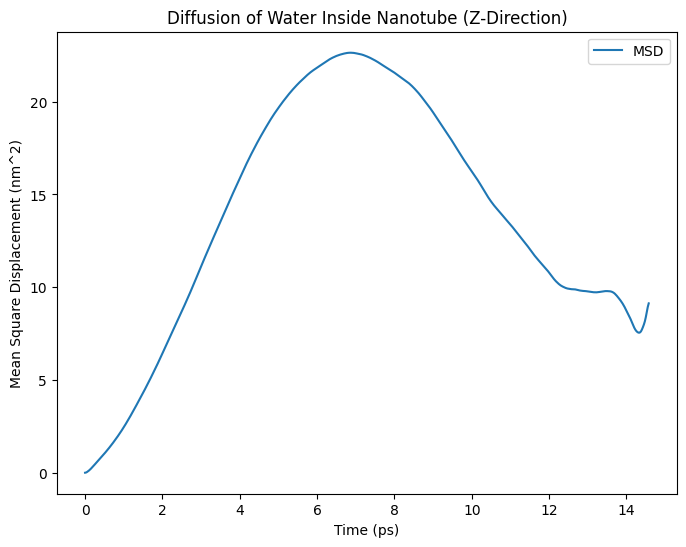

In [64]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        if len(water) == 0:
            return ts.frame
    return None

def analyze_diffusion(topology_file, trajectory_file, nanotube_atom_name='C', water_atom_name='O'):
    u = mda.Universe(topology_file, trajectory_file, format='XYZ')

    nanotube = u.select_atoms(f'name {nanotube_atom_name}')
    min_x, max_x = nanotube.positions[:, 0].min(), nanotube.positions[:, 0].max()
    min_y, max_y = nanotube.positions[:, 1].min(), nanotube.positions[:, 1].max()
    min_z, max_z = nanotube.positions[:, 2].min(), nanotube.positions[:, 2].max()

    print(f"Nanotube coordinates: x: [{min_x}, {max_x}], y: [{min_y}, {max_y}], z: [{min_z}, {max_z}]")

    t_frame = find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)
    
    if t_frame is None:
        print("No time step found with zero water molecules inside the nanotube.")
        t_frame = u.trajectory.n_frames - 1  # Use the last frame for analysis
    
    print(f"Time step with no water molecules inside the nanotube (or end of trajectory): {t_frame}")

    half_frame = t_frame // 2

    u.trajectory[0]
    initial_water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
    water_indices = initial_water.indices
    present_continuously = {idx: True for idx in water_indices}

    for ts in u.trajectory[1:half_frame+1]:
        current_water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        current_indices = set(current_water.indices)
        for idx in water_indices:
            if idx not in current_indices:
                present_continuously[idx] = False

    valid_indices = [idx for idx, present in present_continuously.items() if present]
    print(f"Valid water molecules present continuously from start to frame {half_frame}: {len(valid_indices)}")

    if len(valid_indices) == 0:
        print("No water molecules were continuously present in the nanotube.")
        return None

    u.trajectory[0]
    valid_water = u.atoms[valid_indices]

    # Compute MSD for valid water molecules in the z-direction using MDAnalysis
    msd_analysis = EinsteinMSD(valid_water, select='all', msd_type='z', fft=False)
    msd_analysis.run(start=0, stop=half_frame+1)

    # Debug: print available result attributes
    print("Available results attributes:", dir(msd_analysis.results))
    print("Available results keys:", msd_analysis.results.keys())

    # Access MSD results
    msd_values = msd_analysis.results['msds_by_particle'].mean(axis=1)
    time_steps = msd_analysis.results['timeseries']

    # Time steps in ps (25 fs per frame)
    time_steps = np.arange(len(msd_values)) * 25 * 1e-3

    np.savez('msd_data.npz', time_steps=time_steps, msd_values=msd_values)

    valid_indices = ~np.isnan(msd_values)
    slope, intercept = np.polyfit(time_steps[valid_indices], msd_values[valid_indices], 1)
    diffusion_coefficient = slope / 2  # for 1D diffusion

    print(f"Diffusion coefficient in z-direction: {diffusion_coefficient:.4e} nm^2/ps")

    plt.figure(figsize=(8, 6))
    plt.plot(time_steps, msd_values, label='MSD')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (nm^2)')
    plt.title('Diffusion of Water Inside Nanotube (Z-Direction)')
    plt.legend()
    plt.show()

    return diffusion_coefficient

# Example usage in Jupyter
diffusion_coefficient = analyze_diffusion(
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_12\30\nanotube_with_water_1.xyz',
    r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_12\30\simulation.pos_0.extxyz'
)


Probably the best one: manually computes MSD in the z-direction, tracks water molecules at every time step and filters out those that leave the nanotube at any point during the first half of the trajectory. The script labels and tracks the indices of water molecules across all frames and uses those that are continuously present, whereas previous scripts (like the one using EinsteinMSD) had more automated water selection methods.

Nanotube coordinates: x: [-3.2376699447631836, 13.060019493103027], y: [0.35756000876426697, 16.655250549316406], z: [-1.0, 20.691509246826172]
No time step found with zero water molecules inside the nanotube.
Time step with no water molecules inside the nanotube (or end of trajectory): 949
Valid water molecules present continuously from start to frame 474: 36
Diffusion coefficient in z-direction: 4.3795e-01 A^2/ps


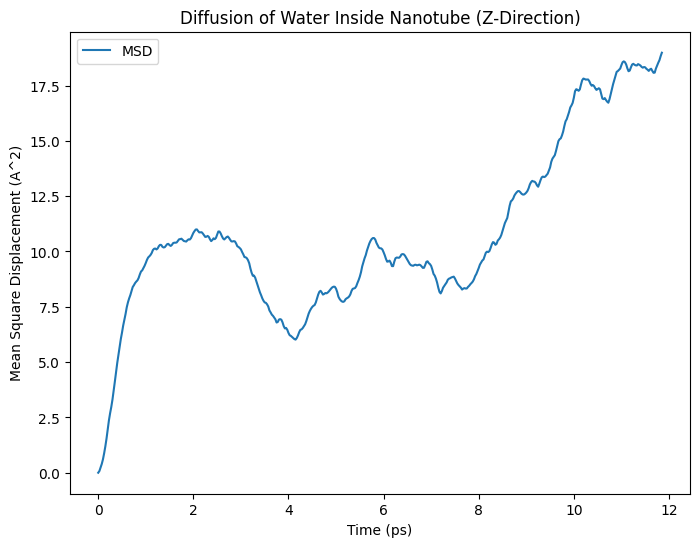

In [74]:
import MDAnalysis as mda
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        if len(water) == 0:
            return ts.frame
    return None

def label_water_molecules(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    labels = {ts.frame: [] for ts in u.trajectory}
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        labels[ts.frame] = water.indices
    return labels

def filter_continuous_water_molecules(labels, half_frame):
    valid_indices = set(labels[0])
    for frame in range(1, half_frame + 1):
        valid_indices.intersection_update(labels[frame])
    return list(valid_indices)

def custom_z_direction_msd(u, valid_indices, half_frame):
    initial_positions = {idx: u.atoms[idx].position[2] for idx in valid_indices}
    msd_dict = {idx: [] for idx in valid_indices}

    for ts in u.trajectory[:half_frame+1]:
        for idx in valid_indices:
            displacement = u.atoms[idx].position[2] - initial_positions[idx]
            msd_dict[idx].append(displacement ** 2)
    
    msd_values = [np.nanmean([msd[i] for msd in msd_dict.values() if len(msd) > i]) for i in range(half_frame+1)]
    return msd_values

def analyze_diffusion(topology_file, trajectory_file, nanotube_atom_name='C', water_atom_name='O'):
    u = mda.Universe(topology_file, trajectory_file, format='XYZ')

    nanotube = u.select_atoms(f'name {nanotube_atom_name}')
    min_x, max_x = nanotube.positions[:, 0].min(), nanotube.positions[:, 0].max()
    min_y, max_y = nanotube.positions[:, 1].min(), nanotube.positions[:, 1].max()
    min_z, max_z = nanotube.positions[:, 2].min()-1, nanotube.positions[:, 2].max()+1

    print(f"Nanotube coordinates: x: [{min_x}, {max_x}], y: [{min_y}, {max_y}], z: [{min_z}, {max_z}]")

    t_frame = find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)
    
    if t_frame is None:
        print("No time step found with zero water molecules inside the nanotube.")
        t_frame = u.trajectory.n_frames - 1  # Use the last frame for analysis
    
    print(f"Time step with no water molecules inside the nanotube (or end of trajectory): {t_frame}")

    half_frame = t_frame // 2

    # Label water molecules at each timestep
    labels = label_water_molecules(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)

    # Filter water molecules that are continuously present from start to half_frame
    valid_indices = filter_continuous_water_molecules(labels, half_frame)
    print(f"Valid water molecules present continuously from start to frame {half_frame}: {len(valid_indices)}")

    if len(valid_indices) == 0:
        print("No water molecules were continuously present in the nanotube.")
        return None

    # Compute custom MSD for valid water molecules in the z-direction
    msd_values = custom_z_direction_msd(u, valid_indices, half_frame)

    # Time steps in ps (25 fs per frame)
    time_steps = np.arange(len(msd_values)) * 25 * 1e-3

    np.savez('msd_data_z_direction.npz', time_steps=time_steps, msd_values=msd_values)

    valid_mask = ~np.isnan(msd_values)
    time_steps_valid = np.array(time_steps)[valid_mask]
    msd_values_valid = np.array(msd_values)[valid_mask]
    
    slope, intercept = np.polyfit(time_steps_valid, msd_values_valid, 1)
    diffusion_coefficient = slope / 2  # for 1D diffusion

    print(f"Diffusion coefficient in z-direction: {diffusion_coefficient:.4e} A^2/ps")

    plt.figure(figsize=(8, 6))
    plt.plot(time_steps_valid, msd_values_valid, label='MSD')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (A^2)')
    plt.title('Diffusion of Water Inside Nanotube (Z-Direction)')
    plt.legend()
    plt.show()

    return diffusion_coefficient

diffusion_coefficient = analyze_diffusion(
     r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_12\20\nanotube_with_water_1.xyz',
     r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_12\20\simulation.pos_0.extxyz')



Nanotube coordinates: x: [-3.2376699447631836, 13.060019493103027], y: [0.35756000876426697, 16.655250549316406], z: [-1.0, 30.537269592285156]
No time step found with zero water molecules inside the nanotube.
Time step with no water molecules inside the nanotube (or end of trajectory): 1167
Valid water molecules present continuously from start to frame 583: 30
Diffusion coefficient in z-direction: -2.0618e-01 A^2/ps


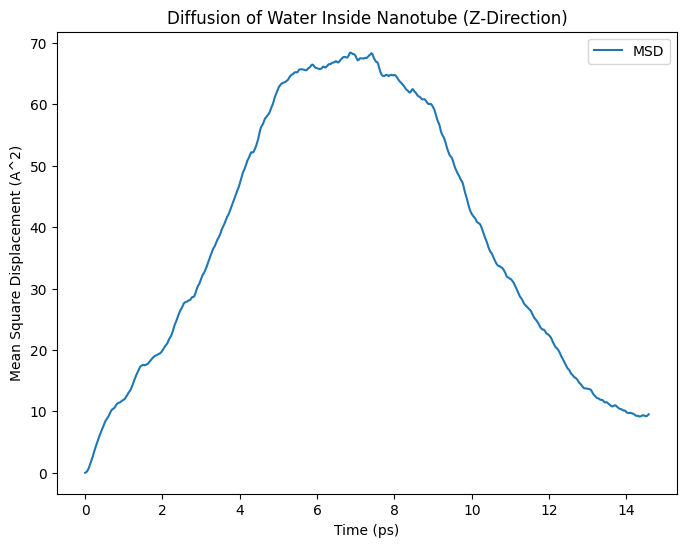

In [80]:
import MDAnalysis as mda
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        if len(water) == 0:
            return ts.frame
    return None

def label_water_molecules(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z):
    labels = {ts.frame: [] for ts in u.trajectory}
    for ts in u.trajectory:
        water = u.select_atoms(f'name {water_atom_name} and (prop x > {min_x} and prop x < {max_x}) and (prop y > {min_y} and prop y < {max_y}) and (prop z > {min_z} and prop z < {max_z})')
        labels[ts.frame] = water.indices
    return labels

def filter_continuous_water_molecules(labels, half_frame):
    valid_indices = set(labels[0])
    for frame in range(1, half_frame + 1):
        valid_indices.intersection_update(labels[frame])
    return list(valid_indices)

def custom_z_direction_msd(u, valid_indices, half_frame):
    initial_positions = {idx: u.atoms[idx].position[2] for idx in valid_indices}
    msd_dict = {idx: [] for idx in valid_indices}

    for ts in u.trajectory[:half_frame+1]:
        for idx in valid_indices:
            displacement = u.atoms[idx].position[2] - initial_positions[idx]
            msd_dict[idx].append(displacement ** 2)
    
    msd_values = [np.nanmean([msd[i] for msd in msd_dict.values() if len(msd) > i]) for i in range(half_frame+1)]
    return msd_values

def analyze_diffusion(topology_file, trajectory_file, nanotube_atom_name='C', water_atom_name='O'):
    u = mda.Universe(topology_file, trajectory_file, format='XYZ')

    nanotube = u.select_atoms(f'name {nanotube_atom_name}')
    min_x, max_x = nanotube.positions[:, 0].min(), nanotube.positions[:, 0].max()
    min_y, max_y = nanotube.positions[:, 1].min(), nanotube.positions[:, 1].max()
    min_z, max_z = nanotube.positions[:, 2].min()-1, nanotube.positions[:, 2].max()+1

    print(f"Nanotube coordinates: x: [{min_x}, {max_x}], y: [{min_y}, {max_y}], z: [{min_z}, {max_z}]")

    t_frame = find_empty_time_step(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)
    
    if t_frame is None:
        print("No time step found with zero water molecules inside the nanotube.")
        t_frame = u.trajectory.n_frames - 1  # Use the last frame for analysis
    
    print(f"Time step with no water molecules inside the nanotube (or end of trajectory): {t_frame}")

    half_frame = t_frame // 2

    # Label water molecules at each timestep
    labels = label_water_molecules(u, water_atom_name, min_x, max_x, min_y, max_y, min_z, max_z)

    # Filter water molecules that are continuously present from start to half_frame
    valid_indices = filter_continuous_water_molecules(labels, half_frame)
    print(f"Valid water molecules present continuously from start to frame {half_frame}: {len(valid_indices)}")

    if len(valid_indices) == 0:
        print("No water molecules were continuously present in the nanotube.")
        return None

    # Compute custom MSD for valid water molecules in the z-direction
    msd_values = custom_z_direction_msd(u, valid_indices, half_frame)

    # Time steps in ps (25 fs per frame)
    time_steps = np.arange(len(msd_values)) * 25 * 1e-3

    np.savez('msd_data_z_direction.npz', time_steps=time_steps, msd_values=msd_values)

    valid_mask = ~np.isnan(msd_values)
    time_steps_valid = np.array(time_steps)[valid_mask]
    msd_values_valid = np.array(msd_values)[valid_mask]
    
    slope, intercept = np.polyfit(time_steps_valid, msd_values_valid, 1)
    diffusion_coefficient = slope / 2  # for 1D diffusion

    print(f"Diffusion coefficient in z-direction: {diffusion_coefficient:.4e} A^2/ps")

    plt.figure(figsize=(8, 6))
    plt.plot(time_steps_valid, msd_values_valid, label='MSD')
    plt.xlabel('Time (ps)')
    plt.ylabel('Mean Square Displacement (A^2)')
    plt.title('Diffusion of Water Inside Nanotube (Z-Direction)')
    plt.legend()
    plt.show()

    return diffusion_coefficient

diffusion_coefficient = analyze_diffusion(
     r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_12\30\nanotube_with_water_1.xyz',
     r'C:\Users\akrya\UROP2024\capped_nanotube\nanotube_12\30\simulation.pos_0.extxyz')

